In [1]:
import numpy as np
import pandas as pd
import investpy
import matplotlib.pyplot as plt
import pickle 
from functools import reduce
import pickle
import datetime
import yfinance as yf

In [ ]:
# Euro from https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html

# Code for scraping - does not work

In [5]:
IS2Y = investpy.bonds.get_bond_historical_data(bond='argentina 1Y',
                                               from_date='01/01/2010',
                                               to_date='31/12/2023')


ConnectionError: ERR#0015: error 403, try again later.

In [1]:

import requests                       # for "get" request to API
import pandas as pd                   # working with data frames
from bs4 import BeautifulSoup         # for web scraping and parsing HTML
from fake_useragent import UserAgent

In [3]:
user_agent = UserAgent()
head = {
    "User-Agent":user_agent.random,
    "X-Requested-With": "XMLHttpRequest",
    "Accept": "text/html",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
}

url = "https://www.investing.com/instruments/HistoricalDataAjax"
req = requests.post(url, headers=head)
req.status_code

403

In [13]:
# create an instance of the class UserAgent
user_agent = UserAgent()
 
headers = {
    "User-Agent": user_agent.random
}
 # Par yield curve rates
res = requests.get("https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023", headers=headers)
 
html = BeautifulSoup(res.text, "lxml")

list_of_tag_years = html.find("select", {"data-drupal-selector": "edit-field-tdr-date-value"}).find_all("option")
list_years = [tag.text for tag in list_of_tag_years[1:len(list_of_tag_years) - 1]]


link = html.find("div", {"class": "csv-feed views-data-export-feed"}).find("a").get("href")



	
df_list = []
 
for year in list_years:
    print(year)
    response = requests.get(link.replace("2023", year)).text.split("\n")
 
    list_table = [[*row.split(",")] for row in response[1:]]
 
    df = pd.DataFrame(list_table, columns=response[0].split(","))
    df.columns = df.columns.str.strip('"')
    df_list.append(df)


	
df_all = pd.concat(df_list)

2023
2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992
1991
1990


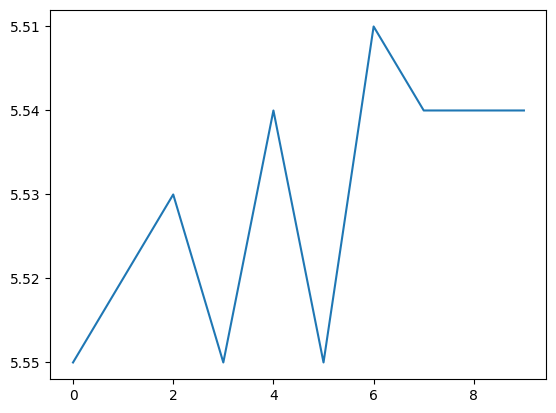

In [26]:
plt.plot(df_all.iloc[:10,1])

In [27]:
with open(f'./yc/US.pkl', 'wb') as handle:
    pickle.dump(df_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

UK MUNGE https://www.bankofengland.co.uk/statistics/yield-curves

In [35]:
uk_2015 = pd.read_excel("yc/GLC Nominal month end data_1970 to 2015.xlsx", sheet_name = 4, skiprows = 3)
uk_2015.head()

,years:,0.5,1,1.5,2,2.5,3,3.5,4,4.5,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-31,NaN,8.635354,8.707430,8.700727,8.664049,8.618702,8.572477,8.528372,8.487617,...,8.870700,8.925363,8.982115,9.040916,9.101725,9.164502,9.229205,9.295793,9.364219,9.434411
2,1970-02-28,NaN,8.413131,8.397269,8.370748,8.337633,8.301590,8.265403,8.230804,8.198713,...,8.565782,8.609622,8.654802,8.701268,8.748968,8.797850,8.847861,8.898948,8.951060,9.004148
3,1970-03-31,NaN,7.744187,7.782761,7.795017,7.793104,7.784963,7.775288,7.766459,7.759564,...,8.637118,8.690039,8.744041,8.799085,8.855131,8.912143,8.970080,9.028905,9.088579,9.149062
4,1970-04-30,NaN,7.606512,7.864352,7.973522,8.002442,7.992813,7.967524,7.938335,7.911422,...,9.650134,9.750003,9.850868,9.952589,10.055023,10.158032,10.261473,10.365213,10.469157,10.573264


In [36]:
uk_2016 = pd.read_excel("yc/GLC Nominal month end data_2016 to present.xlsx", sheet_name = 4, skiprows = 3)
uk_2016.head()

,years:,0.5,1,1.5,2,2.5,3,3.5,4,4.5,...,35.5,36,36.5,37,37.5,38,38.5,39,39.5,40
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-31,NaN,0.244401,0.261230,0.343575,0.448479,0.558078,0.665545,0.768346,0.865648,...,2.313911,2.302217,2.290826,2.279791,2.269156,2.258962,2.249244,2.240031,2.231350,2.223221
2,2016-02-29,NaN,0.247750,0.221971,0.251252,0.307149,0.376114,0.451709,0.530537,0.610655,...,2.283594,2.271275,2.259188,2.247392,2.235940,2.224879,2.214250,2.204090,2.194430,2.185296
3,2016-03-31,0.398924,0.317599,0.304726,0.341113,0.403295,0.478072,0.558702,0.641520,0.724463,...,2.235573,2.222826,2.210364,2.198248,2.186530,2.175260,2.164480,2.154227,2.144532,2.135423
4,2016-04-30,0.403396,0.377009,0.394922,0.451475,0.527891,0.613297,0.702283,0.792029,0.881014,...,2.329159,2.315942,2.303054,2.290554,2.278498,2.266932,2.255899,2.245434,2.235568,2.226326


In [40]:
uk_all = pd.concat((uk_2015, uk_2016))
with open(f'./yc/UK.pkl', 'wb') as handle:
    pickle.dump(uk_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
uk_2015 = pd.read_xlsx("")

# Code to merge bonds

In [17]:
mp_df = pd.read_csv('yc/' + 'SW2Y' + ".csv")
mp_df.tail()

,Date,Price,Open,High,Low,Change %
4995,02/04/2000,2.885,2.885,2.885,2.885,0.91%
4996,02/03/2000,2.859,2.859,2.859,2.859,3.06%
4997,02/02/2000,2.774,2.774,2.774,2.774,-0.14%
4998,02/01/2000,2.778,2.778,2.778,2.778,0.14%
4999,01/31/2000,2.774,2.774,2.774,2.774,1.54%


In [18]:
bonds = ['AU2Y', 'BRZ2Y', 'China2Y', 'DK2Y', 'FR2Y', 'GRM2Y', 'IS2Y', 'JP2Y', 'RS2Y', 'UK2Y', 'US2Y', 'Turkey2Y', 'SW2Y', 'SP2Y']


df_list = []
for bond in bonds:
    tmp_df = pd.read_csv('yc/' + bond + ".csv")
    tmp_df.index = pd.to_datetime(tmp_df.iloc[:,0])
    tmp_df = pd.DataFrame({bond:tmp_df['Price']}, index = tmp_df.index)
    #tmp_df.rename(columns = {'price':bond})
    df_list.append(tmp_df)

df_bonds = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), df_list)

<Axes: xlabel='Date'>

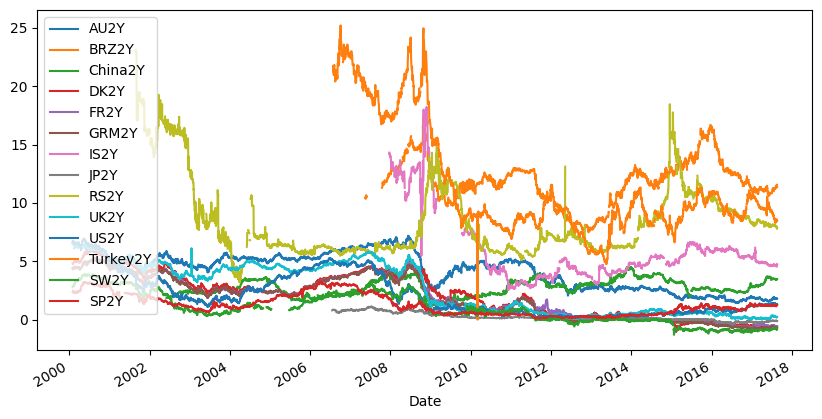

In [19]:
fig, ax = plt.subplots(figsize = (10,5))
df_bonds.plot(ax = ax)

# Code to download features

In [2]:
start_date= "2000-01-01"
end_date="2023-08-01"
dates=pd.date_range(start_date, end_date, freq='d')
date_df= pd.DataFrame(index = dates)

In [304]:
# ,'ISK', TRY
currencies = ['EUR', 'USD', 'GBP', 'CHF', 'AUD', 'DKK', 'SGD', 'RUB', 'CNY']
currency_tickers = []
for cur1 in range(len(currencies)):
    for cur2 in range(cur1+1,len(currencies)):
        currency_tickers.append(currencies[cur1] +currencies[cur2]+ "=X" )


currency = yf.download(currency_tickers, start_date , end_date)






[*********************100%%**********************]  36 of 36 completed


6 Failed downloads:
['DKKCNY=X', 'DKKRUB=X']: Exception('%ticker%: No timezone found, symbol may be delisted')
['SGDRUB=X', 'CHFRUB=X', 'AUDRUB=X', 'RUBCNY=X']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-08-01)')


In [305]:
date_df= pd.DataFrame(index = dates)
currency = currency['Adj Close']
currency = pd.merge(date_df, currency, right_index = True, left_index = True, how = 'left')
currency = currency.loc[currency.index >= datetime.datetime(2003,12,1)]
currency = currency.interpolate()
currency = currency.dropna(axis=1)


In [306]:
with open(f'yc/currencies.pkl', 'wb') as handle:
    pickle.dump(currency, handle, protocol=pickle.HIGHEST_PROTOCOL)

    # .ffill().dropna(axis=1)

In [382]:
gold = yf.download(['GC=F'], start_date , end_date)
crude_oil = yf.download(['CL=F'], start_date , end_date)
snp500futures =  yf.download(['ES=F'], start_date , end_date)
silver =  yf.download(['SI=F'], start_date , end_date)
nikkei=  yf.download(['^N225'], start_date , end_date)
ftse=  yf.download(['^FTSE'], start_date , end_date)
DJfutures=  yf.download(['YM=F'], start_date , end_date)
nasdaqfutures=  yf.download(['NQ=F'], start_date , end_date)
russelfutures = yf.download(['RTY=F'], start_date , end_date)
euronext = yf.download(['^N100'], start_date , end_date)
russiaindex = yf.download(['IMOEX.ME'], start_date , end_date)
singaporeindex = yf.download(['^STI'], start_date , end_date)
chinaindex = yf.download(['000001.SS'], start_date , end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [383]:


# 'russiaindex'
# 'russelfutures'
def rem_time(d):
    return datetime.datetime(d.year, d.month, d.day)
various_list = [gold, crude_oil, snp500futures,  silver, nikkei, ftse, DJfutures, nasdaqfutures, euronext, singaporeindex, chinaindex ]
names = ['gold', 'crude_oil', 'snp500futures', 'silver', 'nikkei', 'ftse', 'DJfutures', 'nasdaqfutures', 'euronext', 'singaporeindex', 'chinaindex']
df_list = []
for i in range(len(various_list)):
    tmp_df = various_list[i]
    tmp_df.index = [rem_time(d) for d in tmp_df.index]
    tmp_df = pd.merge(date_df, tmp_df, right_index = True, left_index = True, how = 'left')
    tmp_df = pd.DataFrame({names[i]:tmp_df['Adj Close']}, index = tmp_df.index)
    df_list.append(tmp_df.interpolate())
    


various = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), df_list)

with open(f'yc/various_index.pkl', 'wb') as handle:
    pickle.dump(various, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:

date_df= pd.DataFrame(index = dates)

vix =  yf.download(['^VIX'], start_date , end_date)
japanvix = pd.read_csv('yc/' + 'japanvix' + ".csv")
japanvix.index = pd.to_datetime(japanvix.iloc[:,0])
japanvix = pd.DataFrame({'japanvix':japanvix['Price']}, index = japanvix.index)
japanvix = pd.merge(date_df, japanvix, right_index = True, left_index = True, how = 'left')

usvix = pd.DataFrame({'usvix':vix['Adj Close']}, index = vix.index)
usvix = pd.merge(date_df, usvix, right_index = True, left_index = True, how = 'left')

# eurovix = pd.read_csv('yc/' + 'eurivx' + ".csv")
# eurovix.index = pd.to_datetime(eurovix.iloc[:,0])
# eurovix = pd.DataFrame({'eurovix':eurovix['Price']}, index = eurovix.index)
eurovix = pd.read_csv("yc/eurovix.txt", sep = ";")
eurovix['Date'] = pd.to_datetime(eurovix['Date'], format= "%d.%m.%Y")
eurovix.index = eurovix['Date']
eurovix = pd.DataFrame({'eurovix':eurovix['Indexvalue']}, index = eurovix.index)

eurovix = pd.merge(date_df, eurovix, right_index = True, left_index = True, how = 'left')


russiavix = pd.read_csv('yc/' + 'russiavix' + ".csv")
russiavix.index = pd.to_datetime(russiavix.iloc[:,0])
russiavix = pd.DataFrame({'russiavix':russiavix['Price']}, index = russiavix.index)
russiavix = pd.merge(date_df, russiavix, right_index = True, left_index = True, how = 'left')

vix_indexes = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), [usvix, japanvix, eurovix, russiavix])
vix_indexes = vix_indexes.interpolate()



with open(f'yc/vixs.pkl', 'wb') as handle:
    pickle.dump(vix_indexes, handle, protocol=pickle.HIGHEST_PROTOCOL)

[*********************100%%**********************]  1 of 1 completed


In [198]:
hcpi_q = pd.read_excel("yc/Inflation-data.xlsx", sheet_name = 'hcpi_m')
hcpi_q.index = 'hcpi_m' + hcpi_q['Country'] 
hcpi_q = hcpi_q.loc[~hcpi_q['Country'].isna()]


In [433]:
# https://www.worldbank.org/en/research/brief/inflation-database
cpi_countries = ['CHE', 'CHN', 'DEU', 'DNK', 'FRA', 'GBR', 'JPN', 'RUS', 'USA', 'AUS']
cpi_list = []
for name in ['hcpi_m', 'ecpi_m', 'fcpi_m', 'ccpi_m']:#, 'ppi_m']:
    hcpi_q = pd.read_excel("yc/Inflation-data.xlsx", sheet_name = name)
    hcpi_q = hcpi_q.loc[np.isin(hcpi_q['Country Code'], cpi_countries)]
    hcpi_q.index = name + hcpi_q['Country'] 
    hcpi_q = hcpi_q.loc[~hcpi_q['Country'].isna()]
    hcpi_q = hcpi_q.iloc[:,5:644]
    hcpi_q = hcpi_q.transpose()
    #hcpi_q.index = [datetime.datetime(int(hcpi_q.index.astype(str)[i][:4]), int(hcpi_q.index.astype(str)[i][4])*3 -2, 1) for i in range(hcpi_q.shape[0]) ]
    hcpi_q.index = [datetime.datetime(int(hcpi_q.index.astype(str)[i][:4]), int(hcpi_q.index.astype(str)[i][4:6]), 1) for i in range(hcpi_q.shape[0]) ]
    for col in hcpi_q.columns:
        hcpi_q[col] = pd.to_numeric(hcpi_q[col], errors='coerce')
    cpi_list.append(hcpi_q)


In [434]:
cpi_data = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), cpi_list)
cpi_data

Country,hcpi_mSwitzerland,hcpi_mChina,hcpi_mGermany,hcpi_mDenmark,hcpi_mFrance,hcpi_mUnited Kingdom,hcpi_mJapan,hcpi_mRussian Federation,hcpi_mUnited States,ecpi_mSwitzerland,...,fcpi_mUnited States,ccpi_mSwitzerland,ccpi_mChina,ccpi_mGermany,ccpi_mDenmark,ccpi_mFrance,ccpi_mUnited Kingdom,ccpi_mJapan,ccpi_mRussian Federation,ccpi_mUnited States
1970-01-01,33.400,NaN,29.2918,13.1,14.30,8.1,30.800,NaN,15.900,31.0174,...,16.300,32.700,NaN,30.0268,13.800,15.000,8.9,31.000,NaN,16.300
1970-02-01,33.400,NaN,29.3570,13.2,14.40,8.2,30.800,NaN,16.000,30.9125,...,16.400,32.700,NaN,30.0751,13.900,15.100,9.0,30.900,NaN,16.400
1970-03-01,33.400,NaN,29.4875,13.3,14.40,8.2,31.200,NaN,16.100,30.4143,...,16.400,32.800,NaN,30.2130,14.000,15.100,9.0,31.100,NaN,16.600
1970-04-01,33.400,NaN,29.6180,13.3,14.50,8.3,31.500,NaN,16.200,30.0735,...,16.400,32.900,NaN,30.3854,14.000,15.200,9.2,31.500,NaN,16.600
1970-05-01,33.700,NaN,29.6180,13.5,14.50,8.4,31.400,NaN,16.300,30.5716,...,16.500,33.200,NaN,30.3784,14.200,15.200,9.2,31.600,NaN,16.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,104.900,132.421439,119.8720,116.6,114.30,124.8,105.800,NaN,125.600,136.2080,...,123.122,103.015,101.60,114.5430,111.409,108.677,120.4,101.601,156.125,123.676
2022-12-01,104.666,132.293247,119.3450,115.9,114.16,125.3,105.981,NaN,125.222,131.8600,...,123.572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01,105.296,133.318777,120.5050,116.4,114.60,124.8,106.592,NaN,126.223,142.0390,...,124.405,103.149,101.83,115.3310,112.026,108.698,120.3,101.702,156.646,124.651
2023-02-01,106.082,132.677821,121.4530,117.5,115.78,126.0,105.879,NaN,126.928,142.0430,...,124.826,103.931,101.83,116.0790,113.473,109.585,121.5,102.005,156.765,125.497


In [201]:
# start_date= "2000-01-01"
# end_date="2022-10-01"
# dates=pd.date_range(start_date, end_date, freq='MS')
# dates_df = pd.DataFrame(index = dates)
# cpi_data = pd.merge(dates_df, cpi_data, right_index = True, left_index = True, how = 'left')
# cpi_data.interpolate().tail(10)

In [435]:
with open(f'yc/cpi_data.pkl', 'wb') as handle:
    pickle.dump(cpi_data.interpolate(), handle, protocol=pickle.HIGHEST_PROTOCOL)

# Get saved data and create y and regressors

## Response

In [2]:
start_date= "2000-01-01"
end_date="2023-08-01"
dates=pd.date_range(start_date, end_date, freq='MS')


In [3]:
# 'BRZ2Y', IS2Y Turkey2Y
bonds = ['AU2Y', 'China2Y', 'DK2Y', 'FR2Y', 'GRM2Y', 'JP2Y', 'RS2Y', 'UK2Y', 'US2Y', 'SW2Y', 'SP2Y']
df_list = []
for bond in bonds:
    tmp_df = pd.read_csv('yc/' + bond + ".csv")
    tmp_df.index = pd.to_datetime(tmp_df.iloc[:,0])
    tmp_df = pd.DataFrame({bond:tmp_df['Price']}, index = tmp_df.index)
    #tmp_df.rename(columns = {'price':bond})
    df_list.append(tmp_df)

df_bonds = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how = 'left'), df_list)

In [4]:
# remove na rows
df_bonds = df_bonds.dropna(axis = 0)

(248, 11)


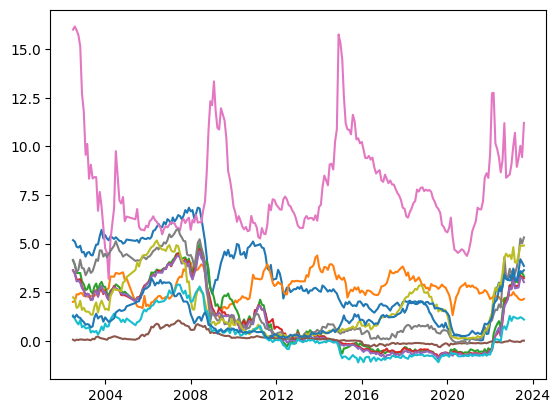

In [5]:
y = df_bonds.loc[np.isin(df_bonds.index, dates)].interpolate()
plt.plot(y)
print(y.shape)

## VIX data

<AxesSubplot: >

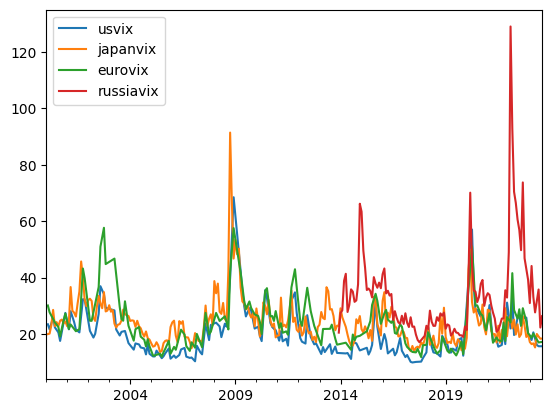

In [6]:
vixs = pd.read_pickle('yc/' + 'vixs' + ".pkl")
vixs = vixs.loc[np.isin(vixs.index, dates)]
vixs.plot()



## Index data

In [7]:
def rem_time(d):
    return datetime.datetime(d.year, d.month, d.day)

<AxesSubplot: >

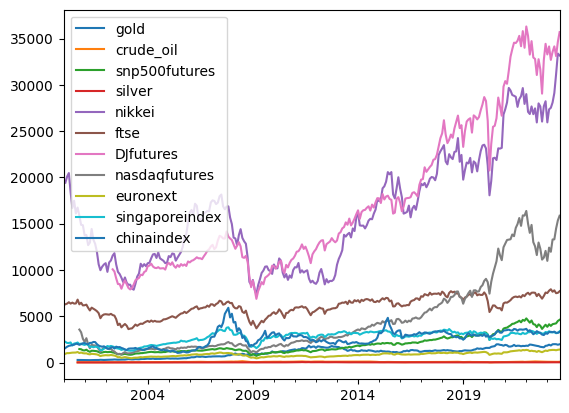

In [8]:
index_data = pd.read_pickle('yc/' + 'various_index' + ".pkl")
index_data = index_data.loc[np.isin(index_data.index, dates)]
# index_data = np.log(index_data.pct_change()+1)

index_data.plot()

## Currency data

In [307]:

currencies = pd.read_pickle('yc/' + 'currencies' + ".pkl")
#currencies.index = [rem_time(d) for d in currencies.index]
#currencies = pd.merge(date_df, currencies['Adj Close'], right_index = True, left_index = True, how = 'left')

#currencies = currencies.interpolate()
#currencies = currencies.dropna(axis = 1)
currencies.index= pd.to_datetime(currencies.index)
currencies
#currencies = currencies.loc[np.isin(currencies.index, dates)]
#currencies = np.log(currencies.pct_change()+1)


,AUDCNY=X,AUDDKK=X,AUDSGD=X,CHFAUD=X,CHFCNY=X,CHFDKK=X,CHFSGD=X,EURAUD=X,EURCHF=X,EURCNY=X,...,GBPCNY=X,GBPDKK=X,GBPSGD=X,SGDCNY=X,USDCHF=X,USDCNY=X,USDDKK=X,USDGBP=X,USDRUB=X,USDSGD=X
2003-12-01,6.007900,4.526000,1.252500,1.058400,6.359200,4.779200,1.326600,1.64330,1.552500,9.875400,...,14.185000,10.683000,2.958900,4.791900,1.298100,8.267201,6.219200,0.58187,29.700001,1.721700
2003-12-02,6.045300,4.506400,1.259200,1.059500,6.414900,4.770500,1.335800,1.65050,1.556200,9.982600,...,14.283000,10.639000,2.973700,4.799200,1.287200,8.267201,6.156600,0.57793,29.690001,1.720000
2003-12-03,6.073900,4.524100,1.264300,1.054600,6.411600,4.765500,1.334700,1.64410,1.557900,9.990300,...,14.257000,10.599000,2.964600,4.801600,1.285200,8.267100,6.139000,0.57867,29.690001,1.716100
2003-12-04,6.070500,4.528800,1.260000,1.053400,6.408900,4.770500,1.329600,1.64120,1.556000,9.973200,...,14.205000,10.592000,2.948100,4.816900,1.288500,8.267000,6.155800,0.58116,29.680000,1.713500
2003-12-05,6.069100,4.496700,1.262000,1.066500,6.474200,4.787000,1.345600,1.65420,1.550400,10.041000,...,14.279000,10.584000,2.969500,4.807900,1.272400,8.266900,6.114400,0.57700,29.620001,1.714000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,4.808980,4.555000,0.893150,1.714800,8.247361,7.810900,1.531580,1.63585,0.953840,7.864800,...,9.168589,8.683200,1.702620,5.384879,0.868850,7.173100,6.787500,0.78163,90.665001,1.330850
2023-07-29,4.775948,4.537333,0.890987,1.718463,8.216598,7.797367,1.531153,1.64224,0.955517,7.835833,...,9.143117,8.684833,1.705433,5.354816,0.869173,7.149667,6.778223,0.78041,91.118334,1.330993
2023-07-30,4.742915,4.519667,0.888823,1.722127,8.185835,7.783833,1.530727,1.64863,0.957193,7.806867,...,9.117645,8.686467,1.708247,5.324753,0.869497,7.126233,6.768946,0.77919,91.571668,1.331137
2023-07-31,4.709883,4.502000,0.886660,1.725790,8.155072,7.770300,1.530300,1.65502,0.958870,7.777900,...,9.092174,8.688100,1.711060,5.294690,0.869820,7.102800,6.759670,0.77797,92.025002,1.331280


## CPI

In [ ]:
['Australia', 'Denmark', 'France', 'Germany', 'Japan', 'United Kingdon', 'United States', 'Italy', 'Ireland', 'Spain']

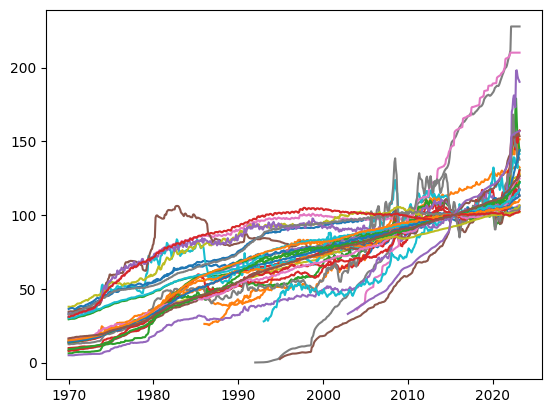

In [9]:
cpi_data = pd.read_pickle('yc/' + 'cpi_data' + ".pkl")

countries = ['Australia',  'China', 'Denmark', 'France', 'Germany', 'Japan', 'Russia', 'United Kingdon', 'United States', 'Singapore']

#bools = [any([s in col for s in countries]) for col in  cpi_data.columns]
#cpi_data = cpi_data.loc[:,bools]
#cpi_data = cpi_data.loc[np.isin(cpi_data.index, dates)]
#cpi_data = cpi_data.pct_change()

_ = plt.plot(cpi_data)


# Let's start by filtering out, and use data from 2011

In [10]:
def calc_shapley_value(B,X=None, Sigma = None):
    if Sigma is None:
        Sigma = np.cov(X.T)
    
    r = Sigma.shape[0]
    val_y = np.dot(B, Sigma).dot(B.T)

    d = val_y.shape[0]
    shapleys = np.zeros((int(d*(d+1)/2), r))
    index = np.arange(r)


    cnt=0
    shap_matrix = np.zeros((r,d,d))
    for i in range(d):
        for j in range(i,d):
            for k in range(r):
                t1 = B[i,k]*B[j,k]*Sigma[k,k]
                t2 = 0.5*np.sum(B[i,index != k]*B[j,k]*Sigma[k,index != k])
                t3 = 0.5*np.sum(B[j,index != k]*B[i,k]*Sigma[k,index != k])
                shapleys[cnt,k] = t1+t2+t3
                shap_matrix[k,i,j] = t1+t2+t3
            cnt+=1

    for k in range(r):
        shap_matrix[k] = shap_matrix[k]+shap_matrix[k].T -np.diag(shap_matrix[k])

    return shapleys, shap_matrix

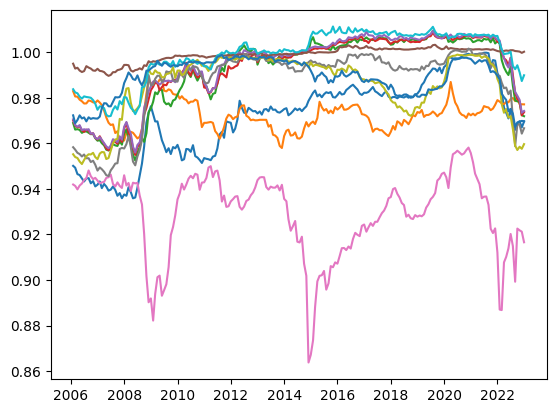

In [11]:

Y =  df_bonds.loc[(df_bonds.index >= datetime.datetime(2006,2,1)) & (df_bonds.index < datetime.datetime(2023,2,1))]
Y = 1/(1+Y/100)
Y = Y.sort_index()
#Y = Y.diff().iloc[1:]
Y_logreturn = np.log(1+ Y.pct_change()).dropna()
dates_used = Y_logreturn.index
_ = plt.plot(Y)

dates_used

In [12]:
vixs

,usvix,japanvix,eurovix,russiavix
2000-01-01,NaN,NaN,NaN,NaN
2000-02-01,23.450001,19.96,30.122400,NaN
2000-03-01,21.639999,20.13,27.682500,NaN
2000-04-01,23.759999,23.13,26.500367,NaN
2000-05-01,25.879999,28.54,25.318233,NaN
...,...,...,...,...
2023-04-01,18.330000,15.22,19.072000,27.66
2023-05-01,16.080000,20.00,18.036000,31.81
2023-06-01,15.650000,19.11,17.000000,35.78
2023-07-01,15.650000,18.32,17.094850,22.29


In [13]:
dates_used_x = dates_used-pd.tseries.offsets.DateOffset(months = 1)

# vix no difference
vix_dif = vixs#np.log(1+vixs.pct_change())
x_vix = vix_dif[['usvix', 'japanvix', 'eurovix']].loc[np.isin(vix_dif.index, dates_used_x)].sort_index()

# index data
index_data_diff = np.log(1+index_data.pct_change())
x_indexes = index_data_diff.loc[np.isin(index_data_diff.index, dates_used_x)].sort_index()


#currencies_diff = currencies.diff(30)
#x_currency = currencies_diff.loc[np.isin(currencies_diff.index, dates_used)]

# CPI data
cpi_diff = cpi_data.diff()
x_cpi = cpi_diff.loc[np.isin(cpi_diff.index, dates_used_x)].sort_index()
#x_cpi = x_cpi.dropna(axis = 1).sort_index()#x_cpi.loc[:, ~np.isin(x_cpi.columns, ['ccpi_mChina',])]


assert Y_logreturn.shape[0] == x_vix.shape[0]
assert Y_logreturn.shape[0] == x_indexes.shape[0]
#assert Y.shape[0] == x_currency.shape[0]
assert Y_logreturn.shape[0] == x_cpi.shape[0]
X = np.hstack((x_vix, x_indexes, x_cpi))

In [15]:
X[0,:]

array([ 0.04636592,  0.02622026,  0.08205602,  0.0832824 ,  0.06951881,
        0.01763369,  0.08624793,  0.01643372,  0.02645168,  0.01578159,
        0.0279471 ,  0.04894979,  0.03064266,  0.08701694,  0.3       ,
        0.44043909,  0.3732    ,  0.8       ,  0.3       ,  0.2       ,
       -0.3       ,  1.07878998,  0.1       ,  1.0309    , -0.16      ,
        0.2413    , -0.5062    ,  0.2828    ,  0.4       ,  0.5892    ,
        0.52876   , -1.5279    ,  0.7       ,  1.        ,  0.4457    ,
        0.8       ,  0.5       ,  0.4       , -1.3       ,  0.9492    ,
       -0.2       ,  0.2       ,  0.05      ,  0.3808    ,  1.        ,
        0.3       ,  0.2       , -0.2       ,  0.512     ,  0.4       ])

In [16]:
np.sum(np.isnan(cpi_diff.loc[np.isin(cpi_diff.index, dates_used_x)].sort_index()))

Country
hcpi_mSwitzerland           0
hcpi_mChina                 0
hcpi_mGermany               0
hcpi_mDenmark               0
hcpi_mFrance                0
hcpi_mUnited Kingdom        0
hcpi_mJapan                 0
hcpi_mRussian Federation    0
hcpi_mUnited States         0
ecpi_mSwitzerland           0
ecpi_mChina                 0
ecpi_mGermany               0
ecpi_mDenmark               0
ecpi_mFrance                0
ecpi_mUnited Kingdom        0
ecpi_mJapan                 0
ecpi_mRussian Federation    0
ecpi_mUnited States         0
fcpi_mSwitzerland           0
fcpi_mChina                 0
fcpi_mGermany               0
fcpi_mDenmark               0
fcpi_mFrance                0
fcpi_mUnited Kingdom        0
fcpi_mJapan                 0
fcpi_mRussian Federation    0
fcpi_mUnited States         0
ccpi_mSwitzerland           0
ccpi_mChina                 0
ccpi_mGermany               0
ccpi_mDenmark               0
ccpi_mFrance                0
ccpi_mUnited Kingdom        0
cc

In [39]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = np.hstack((x_vix, x_indexes, x_cpi))
#X_static = scaler.fit_transform(X)


#r = X.shape[1]
#Y_scaled = scaler.fit_transform(Y)

# Global parameters

In [14]:
import sys
sys.path.insert(0, '../')
from port_measures import portfolio_opt

window = 60
n = Y.shape[0]

# Portfolio estimation covariance

In [15]:
cov_w = dict()
cov_port_return = dict()
for type in ['gmv', 'sharpe', 'uniform']:
    cov_w[type] = []
    cov_port_return[type] = []

for i in range(window, Y.shape[0]-2):
    Y_tmp = np.array(Y_logreturn.iloc[i-window:i,:].copy())
    cov_tmp = np.cov(Y_tmp.T)
    prec_tmp = np.linalg.inv(cov_tmp)
    mu = np.array(Y_tmp.mean(0))

    # GMV portfolio
    for type in ['gmv', 'sharpe', 'uniform']:
        w, mu_p, var_p = portfolio_opt(cov_tmp, prec_tmp, mu, Y_tmp, type = type, w_fix = True)
        cov_w[type].append(w)
        current_price = np.dot(Y.iloc[i+1], w)
        next_price = np.dot(Y.iloc[i+2], w)
        cov_port_return[type].append((next_price-current_price)/current_price)
        


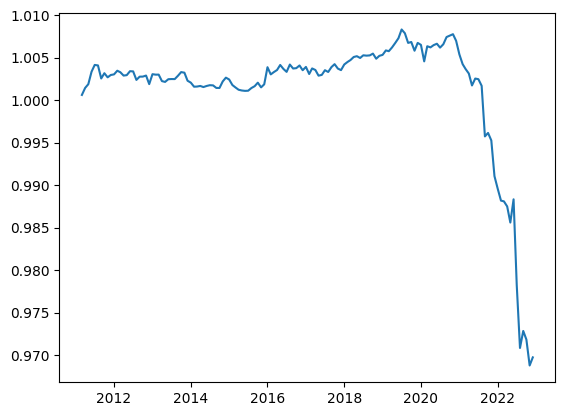

In [16]:
plt.plot(Y_logreturn.index[window:-1], np.cumprod(1+np.array(cov_port_return['sharpe'])))

# Portfolio Estimation CovReg

In [17]:
import sys
sys.path.insert(0, 'C:/Users/User/Code/DyGraph')
sys.path.insert(0, 'C:/Users/User/Code/DyGraph/src')
import CovReg as cr
import tqdm
alphas = [0]#, 1e-8]

In [30]:
covreg_port_return['gmv'][0]

NameError: name 'covreg_port_return' is not defined

In [18]:
i = 60
X_tmp = X[i-window:i,:].copy()
Y_tmp = np.array(Y_logreturn.iloc[i-window:i,:].copy())

cov = cr.CovReg( Y = Y_tmp, alpha = 0, max_iter = 2000, tol = 1e-6,method = 'secant')
cov.fit_hoff(X1 = X_tmp, X2 = X_tmp, C_init = 'cole', verbose=True)

Error 1.29E-1:   1%|          | 12/2000 [00:00<00:02, 856.93it/s]

Error 3.46E-7:   3%|▎         | 51/2000 [00:00<00:02, 944.22it/s]


In [19]:
covreg_w = dict()
covreg_port_return = dict()
for type in ['gmv', 'sharpe', 'uniform']:
    covreg_w[type] = dict()
    covreg_port_return[type] = dict()
    for a_cnt, alpha in enumerate(alphas):
        covreg_w[type][a_cnt] = []
        covreg_port_return[type][a_cnt] = []


for i in range(window, Y.shape[0]-2):
    print(i)
    for a_cnt, alpha in enumerate(alphas): 
        X_tmp = X[i-window:i,:].copy()
        Y_tmp = np.array(Y_logreturn.iloc[i-window:i,:].copy())
        
        cov = cr.CovReg( Y = Y_tmp, alpha = alpha, max_iter = 2000, tol = 1e-6)
        cov.fit_hoff(X1 = None, X2 = X_tmp, C_init = 'cole', verbose=False)
        cov_tmp = np.dot(cov.B, np.outer(X[i+1], X[i+1])).dot(cov.B.T) + cov.Psi
        prec_tmp = np.linalg.inv(cov_tmp)
        #mu_tmp = np.dot(cov.A, X[i+1]) #  np.array(Y_tmp.mean(0))
        mu_tmp = np.array(Y_tmp.mean(0))

        # GMV portfolio
        for type in ['gmv', 'sharpe', 'uniform']:
            w, mu_p, var_p = portfolio_opt(cov_tmp, prec_tmp, mu_tmp, Y_tmp, type = type, w_fix = True)
            covreg_w[type][a_cnt].append(w)
            current_price = np.dot(Y.iloc[i+1], w)
            next_price = np.dot(Y.iloc[i+2], w)
            covreg_port_return[type][a_cnt].append((next_price-current_price)/current_price)
        


60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201


Text(0.5, 1.0, 'GMV')

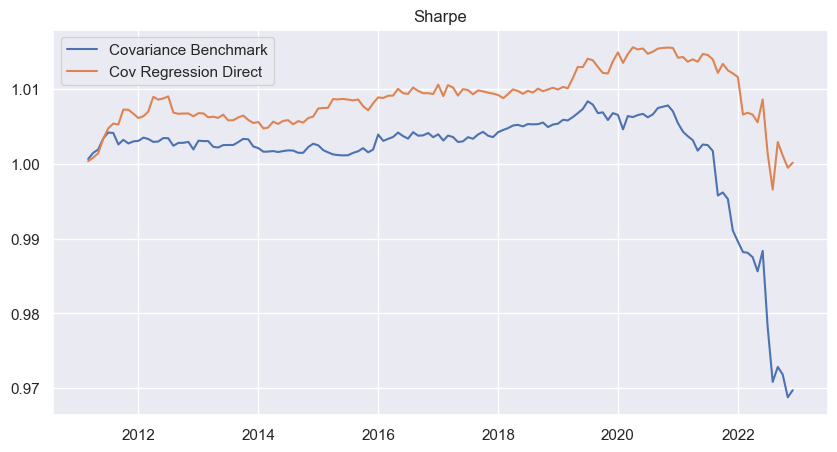

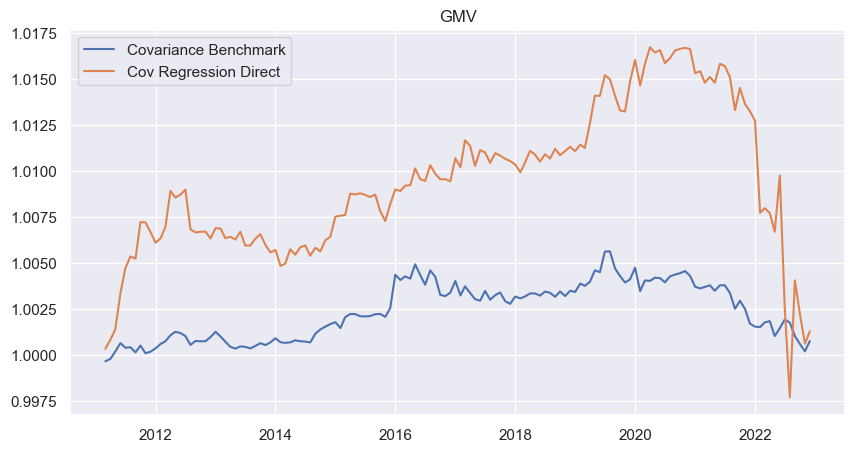

In [20]:

fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(Y_logreturn.index[window:-1], np.cumprod(1+np.array(cov_port_return['sharpe'])), label = 'Covariance Benchmark')
ax.plot(Y_logreturn.index[window:-1], np.cumprod(1+np.array(covreg_port_return['sharpe'][0])), label = 'Cov Regression Direct')
ax.legend()
ax.set_title("Sharpe")

fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(Y_logreturn.index[window:-1], np.cumprod(1+np.array(cov_port_return['gmv'])), label = 'Covariance Benchmark')
ax.plot(Y_logreturn.index[window:-1], np.cumprod(1+np.array(covreg_port_return['gmv'][0])), label = 'Cov Regression Direct')
ax.legend()
ax.set_title("GMV")




In [457]:
import sys
sys.path.insert(0, 'C:/Users/User/Code/DyGraph')
sys.path.insert(0, 'C:/Users/User/Code/DyGraph/src')
import CovReg as cr
import tqdm

In [464]:
cov = cr.CovReg( Y = np.array(Y_scaled), alpha = 0, max_iter = 2000, tol = 1e-6)
cov.fit_hoff(X1 = X_static, X2 = X_static, C_init = 'cole')
print(cov.marg_lik(X1 = X_static, X2 = X_static))
print(cov.likelihood(X1 = X_static, X2 = X_static))
print(cov.nr_params())

Error 9.98E-7:  34%|███▍      | 675/2000 [00:01<00:02, 560.97it/s]


3885.883131385829
-1618.9616011698088
902


In [475]:
902--1618

2520

In [471]:
cov = cr.CovReg( Y = np.array(Y_scaled), alpha = 1e-5, max_iter = 2000, tol = 1e-6)
cov.fit_hoff(X1 = X_static, X2 = X_static, C_init = 'cole')
print(cov.marg_lik(X1 = X_static, X2 = X_static))
print(cov.likelihood(X1 = X_static, X2 = X_static))
print(cov.nr_params())

Error 4.63E-7:  19%|█▉        | 388/2000 [01:25<05:54,  4.55it/s]


2551.4252499361605
-1715.1217725550516
825


In [485]:
825--1715

2540

In [486]:
np.linspace(0, 1e-1, 10)

array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ])

In [487]:
np.logspace(-10, -1, 10)

array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01])

In [479]:
alphas = np.logspace(-10, -1, 10)
liks = np.zeros(len(alphas))
marg_liks = np.zeros(len(alphas))
nr_params = np.zeros(len(alphas))
for a_idx, alpha in enumerate(alphas):
    cov = cr.CovReg( Y = np.array(Y_scaled), alpha = alpha, max_iter = 2000, tol = 1e-6)
    cov.fit_hoff(X1 = X_static, X2 = X_static, C_init = 'cole', verbose=True)
    marg_liks[a_idx] = cov.marg_lik(X1 = X_static, X2 = X_static)
    liks[a_idx] = cov.likelihood(X1 = X_static, X2 = X_static)
    nr_params[a_idx] = cov.nr_params()



Error NaN:   0%|          | 7/2000 [00:00<00:13, 145.80it/s]


In [351]:
X_static.shape

(221, 10)

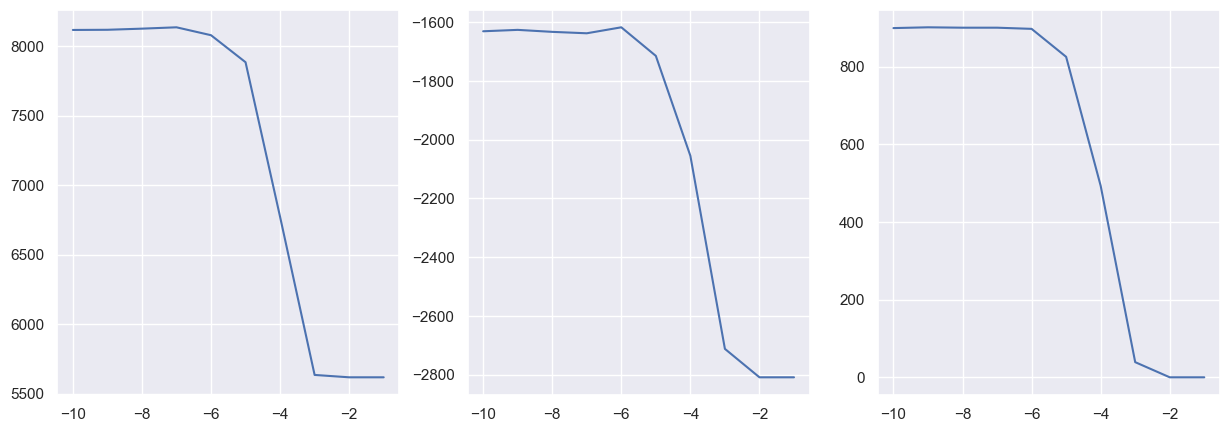

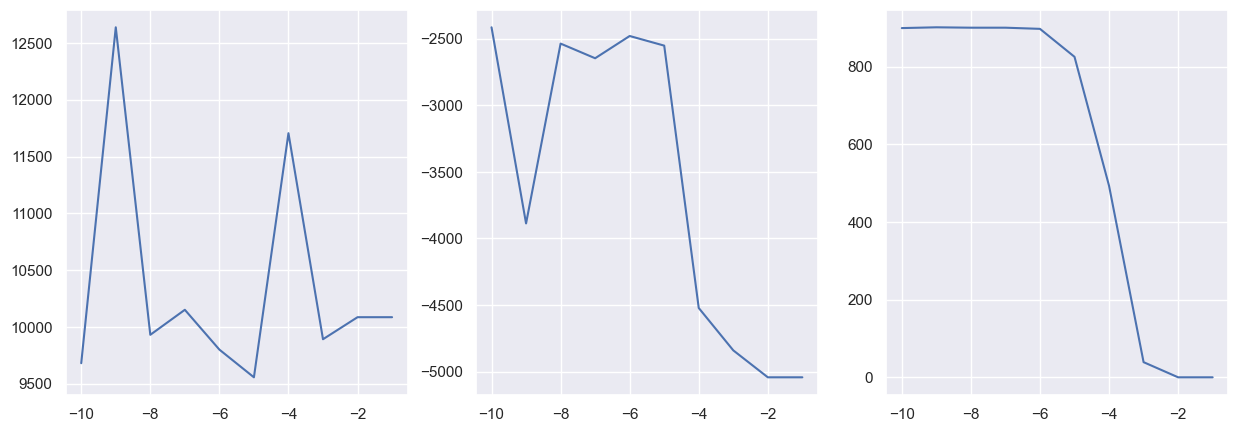

In [484]:

n = Y.shape[0]
fig, ax = plt.subplots(1,3, figsize = (15, 5))
ax[0].plot(np.log10(alphas), -2*liks + np.log(n)*nr_params)
ax[1].plot(np.log10(alphas), liks)
ax[2].plot(np.log10(alphas), nr_params)

fig, ax = plt.subplots(1,3, figsize = (15, 5))
ax[0].plot(np.log10(alphas), 2*marg_liks + np.log(n)*nr_params)
ax[1].plot(np.log10(alphas), -marg_liks)
ax[2].plot(np.log10(alphas), nr_params)

In [277]:
cov.marg_lik(X2 = X_static)

(1868.74011634628, 1791)

In [250]:
Shap, Shap_matrix = calc_shapley_value(cov.B,X = X_static)

In [269]:
shap_trace = np.zeros(r)
for k in range(r):
    shap_trace[k] = np.sum(np.diag(Shap_matrix[k]))


In [260]:
X_2011.columns[np.argmax(shap_trace)]

'hcpi_qGermany'

In [261]:
X_2011.columns[np.argmin(shap_trace)]

'def_qMacao SAR, China'

In [270]:
X_2011.columns[(shap_trace<0.1) & (shap_trace>-0.1)]

Index(['chinaindex', 'CHFAUD=X', 'CHFTRY=X', 'EURCHF=X', 'EURGBP=X',
       'EURUSD=X', 'GBPCHF=X', 'GBPDKK=X', 'GBPSGD=X', 'USDCHF=X', 'USDDKK=X',
       'USDGBP=X', 'USDISK=X', 'ecpi_qRussian Federation', 'fcpi_qChina',
       'def_qTaiwan, China'],
      dtype='object')